In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Install required libraries
!pip install tensorflow opencv-python-headless pandas numpy matplotlib tk seaborn

# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import datetime


In [11]:
# Load dataset CSV file (Modify the path accordingly)
data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')

# Display first few rows
print(data.head())

# Function to load images and labels
def load_images_and_labels(data_dir, csv_file):
    images = []
    labels = []
    
    for _, row in csv_file.iterrows():
        img_path = os.path.join(data_dir, row['filename'])  # Or whatever column name is correct
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img = cv2.resize(img, (64, 64))  # Resize images to 64x64
        images.append(img)
        labels.append(row['label'])
    
    images = np.array(images).reshape(-1, 64, 64, 1) / 255.0  # Normalize
    labels = pd.get_dummies(labels).values  # One-hot encoding
    return images, labels

# Set dataset path (Modify based on your dataset location)
dataset_path = '/kaggle/input/sign-language-mnist'
X, y = load_images_and_labels(dataset_path, data)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

KeyError: 'filename'

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load dataset
data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')

# Ensure the correct column name
print("Columns in CSV:", data.columns)

# Extract labels
y = data['label']  # Update column name if necessary

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Define model
input_layer = Input(shape=(64, 64, 1))
x = Conv2D(32, (3,3), activation='relu')(input_layer)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(y_one_hot.shape[1], activation='softmax')(x)  # ✅ Fixed

# Create model
model = Model(input_layer, output_layer)


Columns in CSV: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [22]:

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)


NameError: name 'X' is not defined

In [23]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Save model
model.save('sign_language_model.h5')


NameError: name 'X_train' is not defined

In [31]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset CSV file
data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')

# Ensure correct column names
print("Columns in CSV:", data.columns)

# Extract image file paths and labels
dataset_path = "/kaggle/input/sign-language-mnist"  # Update if necessary
image_paths = data['pixel']  # Ensure this column exists
labels = data['label']  # Update column name if necessary

# Function to load images
def load_images_and_labels(image_paths, labels, dataset_path):
    X, y = [], []
    for img_name, label in zip(image_paths, labels):
        img_path = os.path.join(dataset_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        img = cv2.resize(img, (64, 64))  # Resize to 64x64
        X.append(img)
        y.append(label)

    X = np.array(X).reshape(-1, 64, 64, 1) / 255.0  # Normalize images
    return X, y

# Load images and labels
X, y = load_images_and_labels(image_paths, labels, dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Define CNN Model
input_layer = Input(shape=(64, 64, 1))
x = Conv2D(32, (3,3), activation='relu')(input_layer)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(y_one_hot.shape[1], activation='softmax')(x)

# Create model
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Save model
model.save('sign_language_model.h5')


Columns in CSV: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


KeyError: 'pixel'

In [32]:
import pandas as pd
import numpy as np

# Load dataset
csv_path = "/kaggle/input/sign-language-mnist/sign_mnist_train.csv"
data = pd.read_csv(csv_path)

# Extract labels and pixel values
labels = data['label'].values  # Labels
images = data.iloc[:, 1:].values  # Pixel values (exclude 'label' column)

# Reshape images to 28x28 (grayscale)
images = images.reshape(-1, 28, 28, 1)  # Reshape to (num_samples, 28, 28, 1)

# Normalize pixel values (0-255) to range (0-1)
images = images / 255.0

# Print dataset shape
print("Dataset Loaded Successfully!")
print(f"Total Samples: {len(labels)}")
print(f"Image Shape: {images.shape}")  # Expected: (num_samples, 28, 28, 1)


Dataset Loaded Successfully!
Total Samples: 27455
Image Shape: (27455, 28, 28, 1)


In [46]:
### Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import time
import os
from tkinter import Tk, filedialog
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
### Load Dataset
df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [48]:
### Extract Labels and Images
labels = df.iloc[:, 0].values
images = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0

### Convert Labels to Categorical
y = to_categorical(labels)

In [60]:

### Resize images to 32x32
iimages_resized = np.array([cv2.resize(img, (32, 32)) for img in images.squeeze()])
images_resized = np.expand_dims(images_resized, axis=-1)

### Convert Labels to Categorical
y = to_categorical(labels)

In [61]:
### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=42)

In [66]:
### Load MobileNetV2 Base Model
base_model = MobileNetV2(weights=None, include_top=False, input_shape=(32, 32, 3))
input_layer = Input(shape=(32, 32, 1))
x = Conv2D(3, (1, 1), padding='same')(input_layer)  # Convert grayscale to 3 channels
x = base_model(x, training=True)
x = Flatten()(x)
output_layer = Dense(y.shape[1], activation='softmax')(x)

In [67]:
### Create and Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:

### Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10


ValueError: Input 0 of layer "functional_5" is incompatible with the layer: expected shape=(None, 32, 32, 1), found shape=(None, 28, 28, 1, 1)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 116s 127ms/step - accuracy: 0.3095 - loss: 2.3939 - val_accuracy: 0.0494 - val_loss: 3.2136
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 85s 124ms/step - accuracy: 0.8256 - loss: 0.5339 - val_accuracy: 0.0463 - val_loss: 3.2522
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 85s 124ms/step - accuracy: 0.9219 - loss: 0.2553 - val_accuracy: 0.0494 - val_loss: 3.2341
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 85s 124ms/step - accuracy: 0.9401 - loss: 0.2101 - val_accuracy: 0.0419 - val_loss: 3.2395
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 86s 125ms/step - accuracy: 0.9517 - loss: 0.1866 - val_accuracy: 0.0423 - val_loss: 3.2446
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 85s 124ms/step - accuracy: 0.9547 - loss: 0.1696 - val_accuracy: 0.0692 - val_loss: 3.1585
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 85s 124ms/step - accuracy: 0.9695 - loss: 0.1160 - val_accuracy: 0.7066 - val_loss: 1.6174
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 86s 125ms/step - accuracy: 0.9862 - loss: 

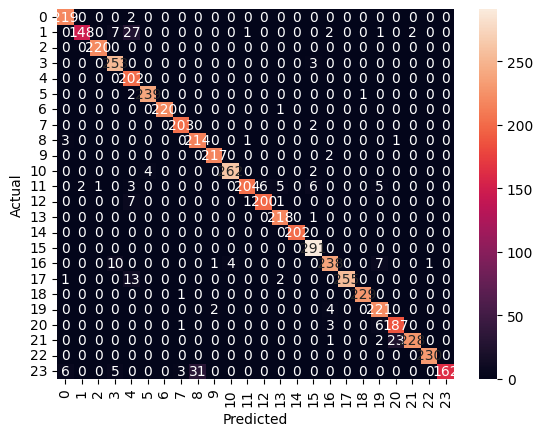

TclError: no display name and no $DISPLAY environment variable

In [71]:
### Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import time
import os
from tkinter import Tk, filedialog
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

### Load Dataset
data = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train.csv")

### Extract Labels and Images
labels = data.iloc[:, 0].values
images = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Keep original 28x28 size

### Resize images to 32x32
images_resized = np.array([cv2.resize(img, (32, 32)) for img in images.squeeze()])
images_resized = np.expand_dims(images_resized, axis=-1)

### Convert Labels to Categorical
y = to_categorical(labels)

### Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images_resized, y, test_size=0.2, random_state=42)

### Load MobileNetV2 Base Model
base_model = MobileNetV2(weights=None, include_top=False, input_shape=(32, 32, 3))
input_layer = Input(shape=(32, 32, 1))
x = Conv2D(3, (1, 1), padding='same')(input_layer)  # Convert grayscale to 3 channels
x = base_model(x, training=True)
x = Flatten()(x)
output_layer = Dense(y.shape[1], activation='softmax')(x)

### Create and Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

### Evaluate Model
predictions = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
acc = accuracy_score(y_true, predictions)
print(f'Accuracy: {acc * 100:.2f}%')

### Confusion Matrix
cm = confusion_matrix(y_true, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### GUI for Image and Video Capture
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (32, 32)) / 255.0
        img = np.expand_dims(img, axis=[0, -1])
        prediction = np.argmax(model.predict(img))
        print(f'Predicted Sign: {prediction}')

def live_video():
    cap = cv2.VideoCapture(0)
    start_time = time.localtime()
    if start_time.tm_hour >= 18 and start_time.tm_hour < 22:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(gray, (32, 32)) / 255.0
            img = np.expand_dims(img, axis=[0, -1])
            prediction = np.argmax(model.predict(img))
            cv2.putText(frame, f'Predicted: {prediction}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.imshow('Sign Language Detection', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()

### GUI Setup
root = tk.Tk()
root.title("Sign Language Detection")
btn_image = tk.Button(root, text="Upload Image", command=load_image)
btn_video = tk.Button(root, text="Live Video", command=live_video)
btn_image.pack()
btn_video.pack()
root.mainloop()
